In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df= pd.read_csv("house_price_regression_dataset.csv")

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06
Square_meters,1000.0,261.561263,116.641153,46.730229,162.533868,265.934952,357.630252,4.644223e+02
Lot_Size_m2,1000.0,11242.530886,5252.432326,2047.946765,6741.849216,11370.626082,15877.116305,2.019101e+04
Living_Space_Index,1000.0,0.032132,0.028607,0.002331,0.014167,0.023050,0.038790,2.074505e-01
Age,1000.0,38.450000,20.632916,3.000000,20.750000,39.000000,56.000000,7.500000e+01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [16]:
df.duplicated().sum()

0

In [58]:
df["Square_meters"]=df["Square_Footage"]*0.09290304

df['Lot_Size_m2'] = df['Lot_Size'] * 4046.86

df.drop(['Square_Footage', 'Lot_Size'], axis=1, inplace=True)


In [60]:
df.columns

Index(['Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Garage_Size',
       'Neighborhood_Quality', 'House_Price', 'Square_meters', 'Lot_Size_m2'],
      dtype='object')

In [62]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

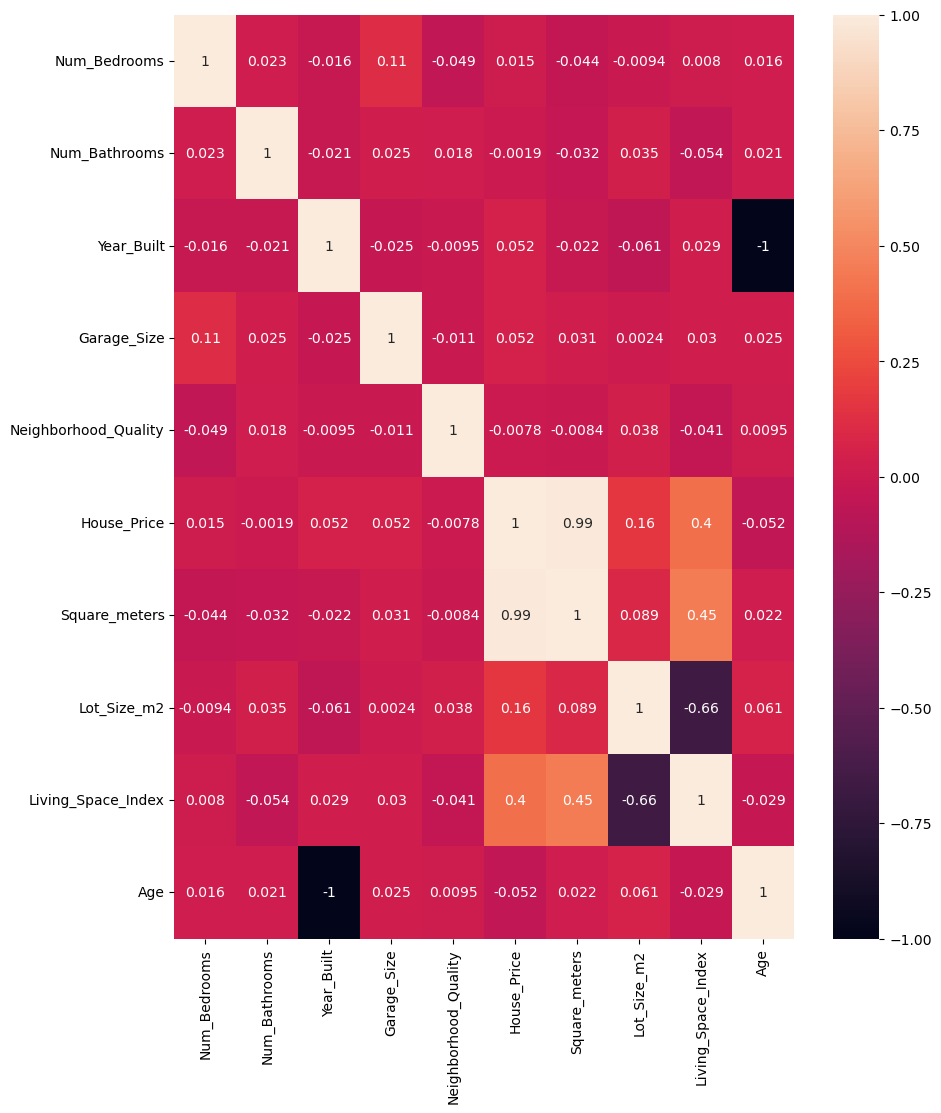

In [98]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True)
plt.show

*House price increases with built area, lot size, and neighborhood quality.

*Bedrooms and bathrooms show a weaker relationship compared to size based features.

*No major missing values, and overall distributions are clean for modeling.

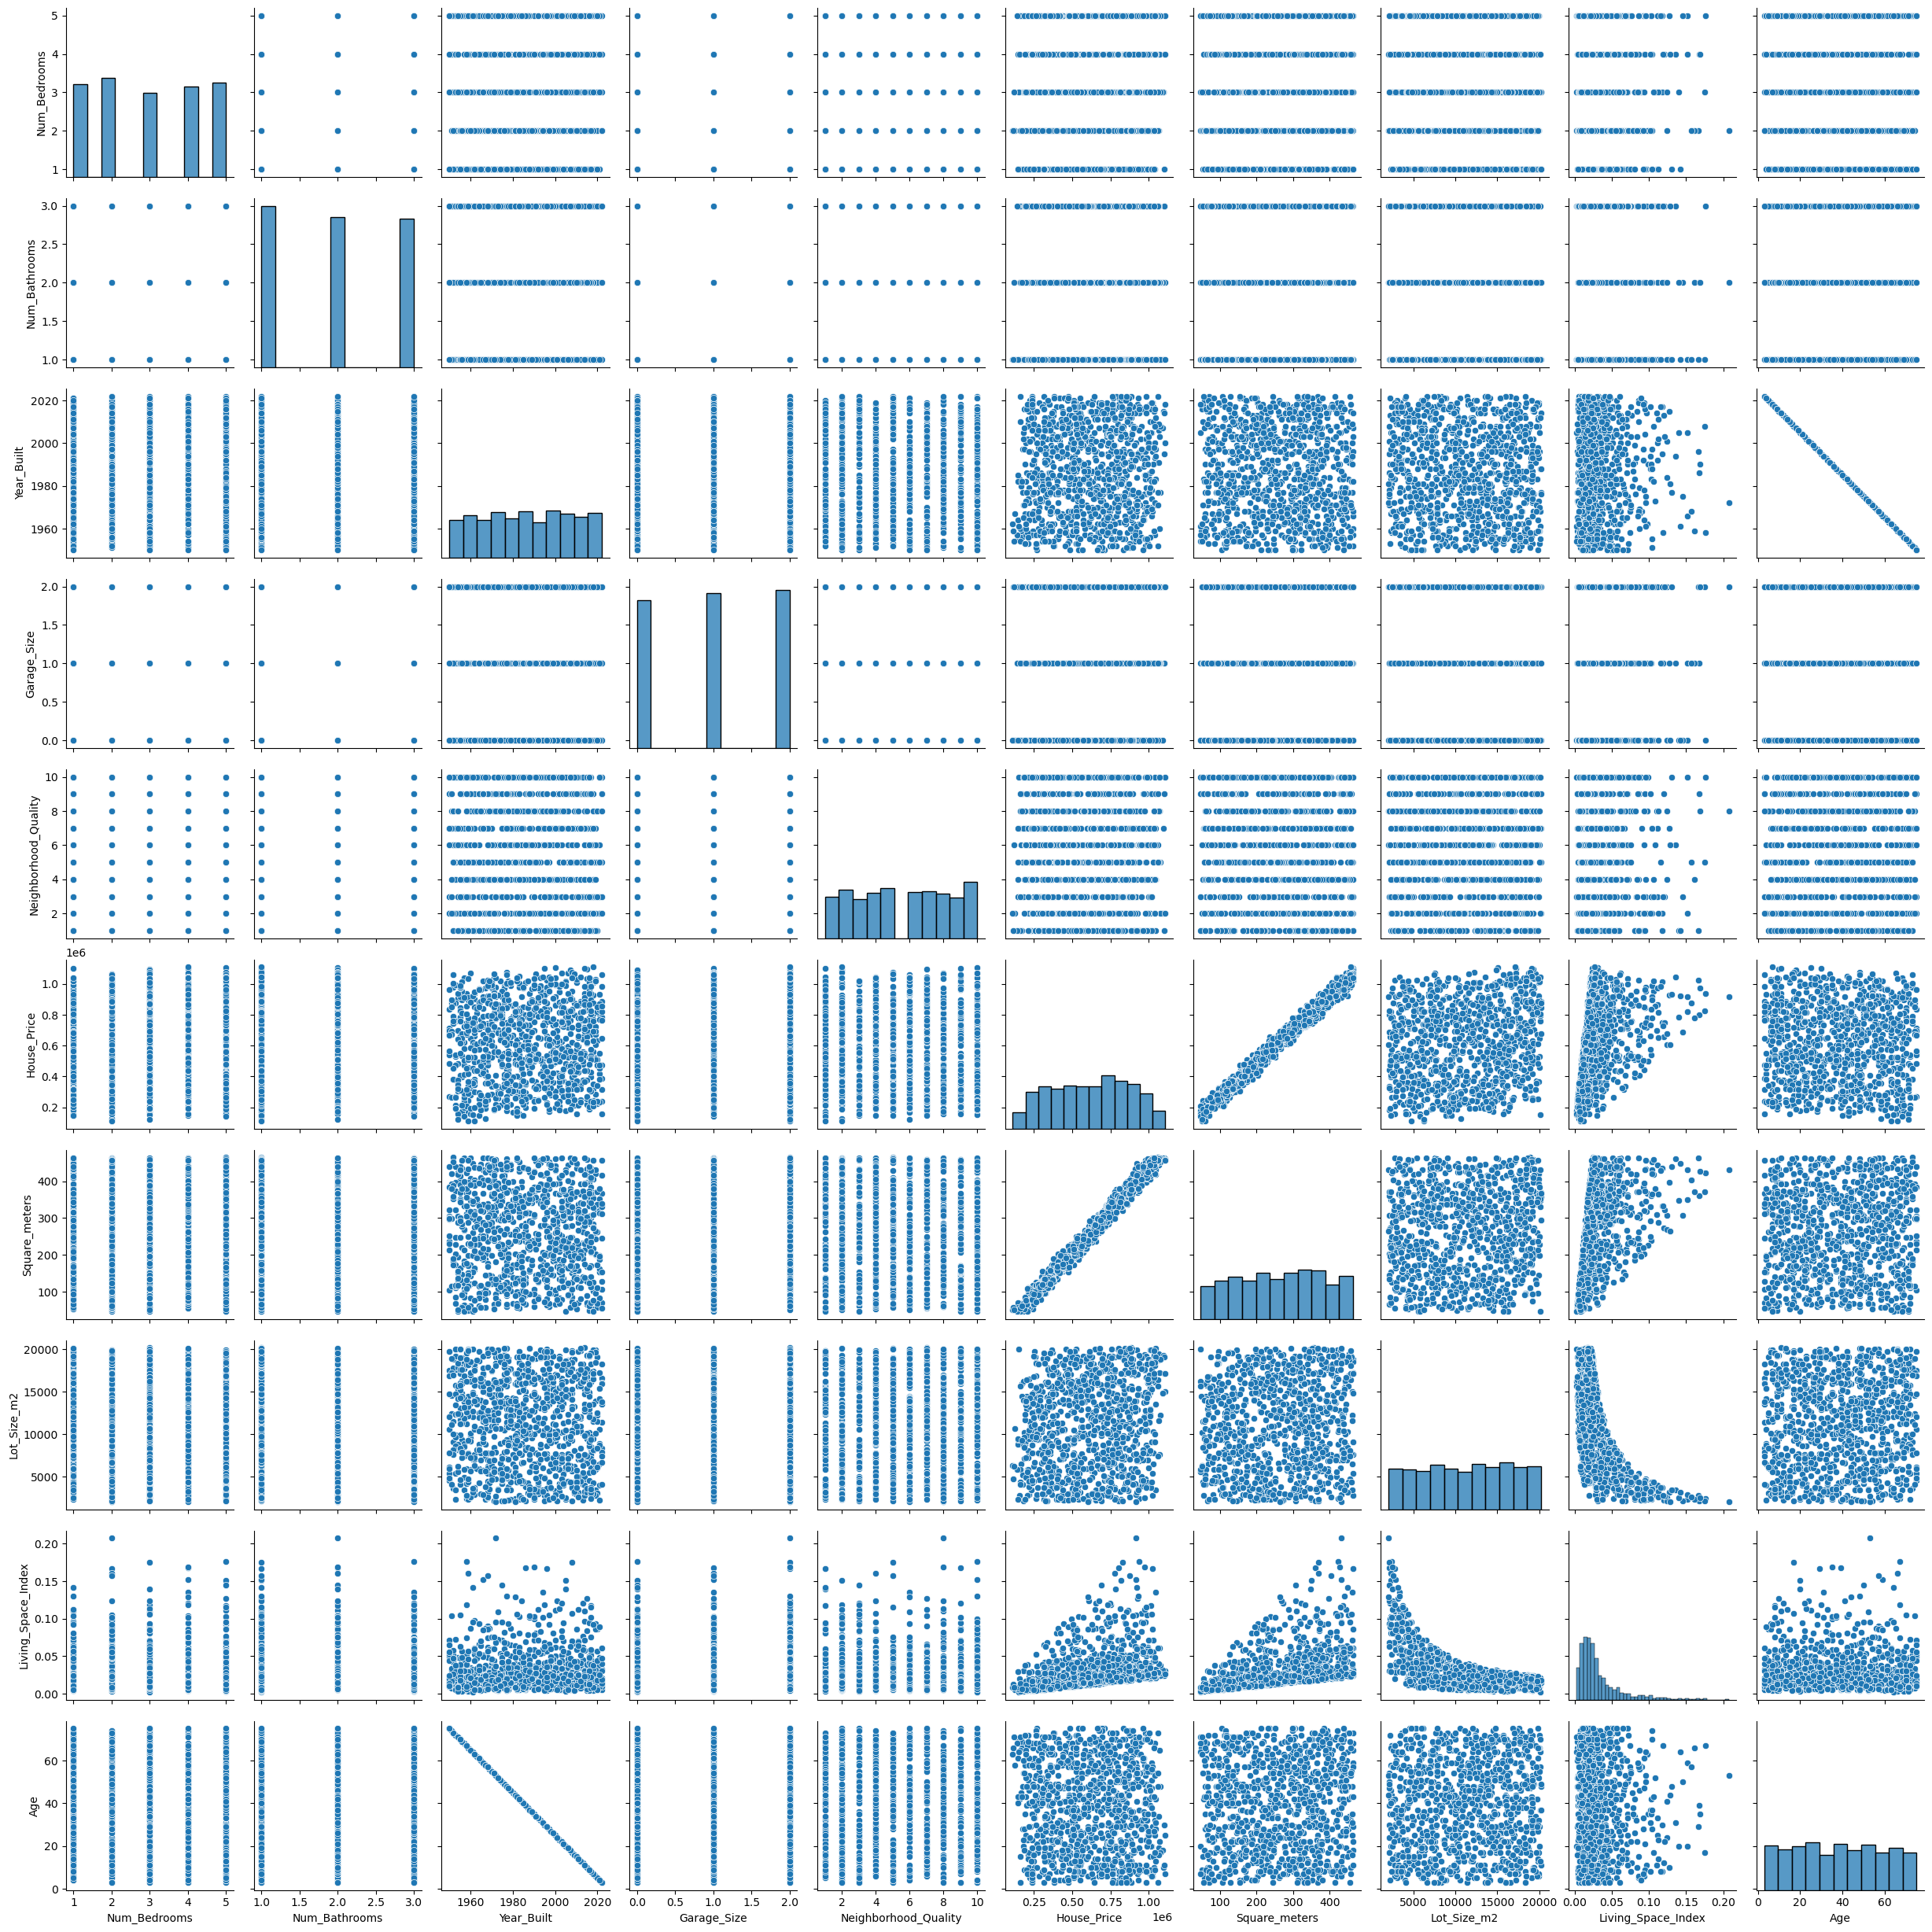

In [122]:
sns.pairplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x27184afc2c0>,
 'caps': [<matplotlib.lines.Line2D at 0x27184f16780>,
 'boxes': [<matplotlib.lines.Line2D at 0x27184dca2a0>],
 'medians': [<matplotlib.lines.Line2D at 0x27184f16030>],
 'fliers': [<matplotlib.lines.Line2D at 0x27184f35460>],
 'means': []}

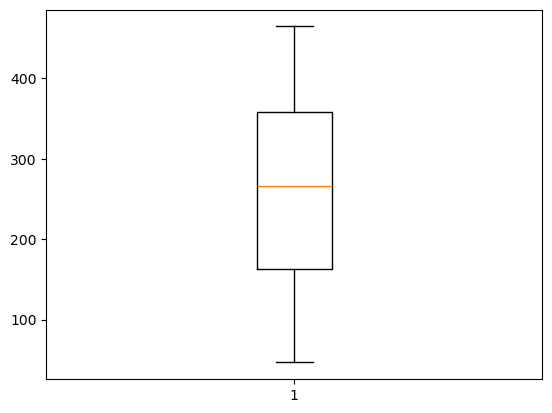

In [124]:
plt.boxplot(df['Square_meters'])

In [56]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Square_meters
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,126.348134
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,396.881787
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,333.707720
3,966,1,2,1977,2.730667,1,8,2.296989e+05,89.744337
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,457.640375


In [102]:
X = df[['Square_meters', 'Lot_Size_m2', 'Num_Bedrooms', 'Num_Bathrooms']]

y = df['House_Price']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [74]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
X_const = sm.add_constant(X)

vifdf = pd.DataFrame()
vifdf["Feature"] = X.columns
vifdf["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

vifdf

,Feature,VIF
0,Square_meters,1.011093
1,Lot_Size_m2,1.009563
2,Num_Bedrooms,1.002405
3,Num_Bathrooms,1.002913


## since vif ~ 1 there is no change needed

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
)

In [114]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

yhat = model.predict(X_test_scaled)

In [118]:
r2= r2_score(y_test,yhat)

In [120]:
r2

0.9920666430057187

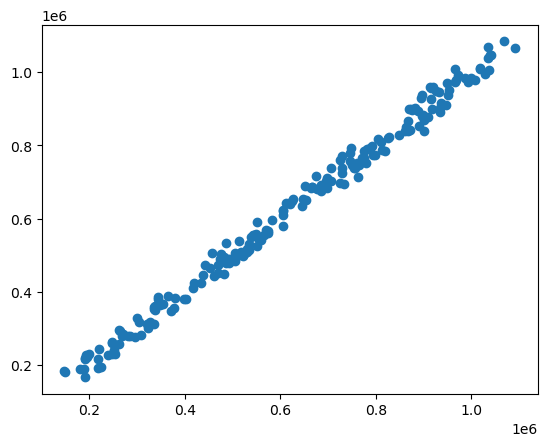

In [132]:
plt.scatter(y_test,yhat)

-The model performs well, with area-related features contributing the most to price.

VIF values are below 5, showing no multicollinearity issues.

Scaling improved stability and gave more reliable coefficient estimates.